## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing #label encoding
from imblearn.over_sampling import SMOTE #oversample data
from sklearn.model_selection import train_test_split #split data
from sklearn.linear_model import LogisticRegression #ML model

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, mean_squared_error

## Data overview
Below are the list of the first lines of the data showing its features and structure

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=",")
df.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Print different data fields

List the only the ages of all the patients

In [3]:
df["age"].values

array([67., 61., 80., ..., 35., 51., 44.])

List the average glucose level  and gender of all the patients with their index

In [4]:
df["avg_glucose_level"]

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

In [5]:
df["gender"]

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

### Data Visualization 

Boxplots showing the relationship between different parameters (age, bmi, avg_glucose_level) and stroke

<function matplotlib.pyplot.show(close=None, block=None)>

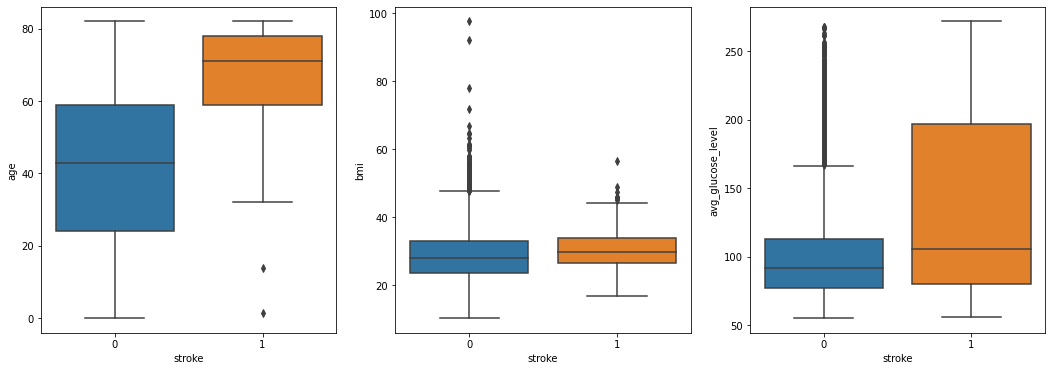

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6))

sns.boxplot(data=df,y=df['age'],x=df['stroke'],palette='tab10' , ax=axes[0]) # panel 1
sns.boxplot(data=df,y=df['bmi'],x=df['stroke'],palette='tab10' , ax=axes[1]) # panel 2
sns.boxplot(data=df,y=df['avg_glucose_level'],x=df['stroke'],palette='tab10' , ax=axes[2])

plt.show

Countplots showing the relationship between different parameters (gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking_status) and stroke

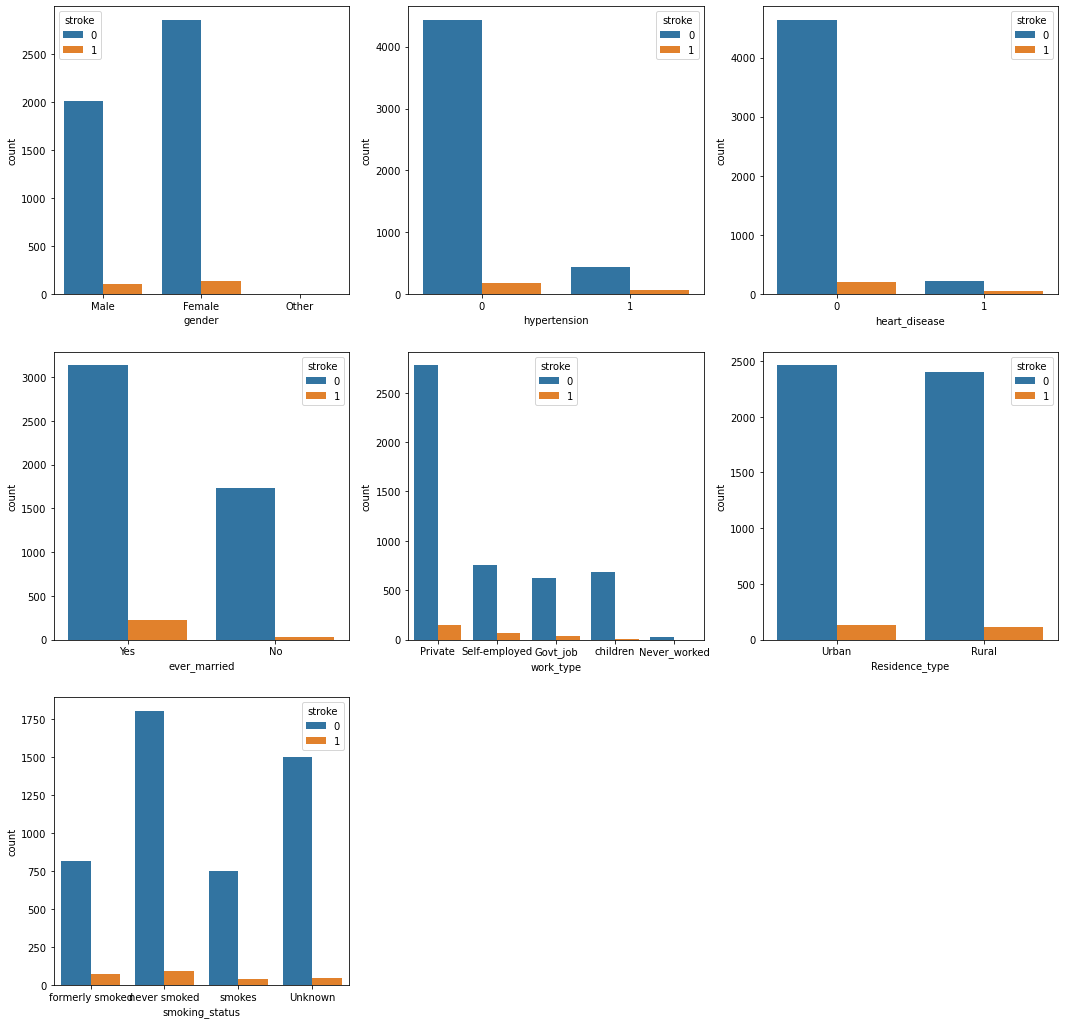

In [7]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 18))

fig.delaxes( ax=axes[2,1])
fig.delaxes( ax=axes[2,2])

sns.countplot(x="gender", hue='stroke', palette='tab10', data=df , ax=axes[0,0])
sns.countplot(x="hypertension", hue='stroke', palette="tab10", data=df , ax=axes[0,1])
sns.countplot(x="heart_disease", hue='stroke', palette="tab10", data=df , ax=axes[0,2])

sns.countplot(x="ever_married", hue='stroke', palette="tab10", data=df , ax=axes[1,0])
sns.countplot(x="work_type", hue='stroke', palette="tab10", data=df , ax=axes[1,1])
sns.countplot(x="Residence_type", hue='stroke', palette="tab10", data=df , ax=axes[1,2])

sns.countplot(x="smoking_status", hue='stroke', palette="tab10", data=df , ax=axes[2,0])

plt.show()

Heatmap showing the correlation between different parameters and output

<AxesSubplot:>

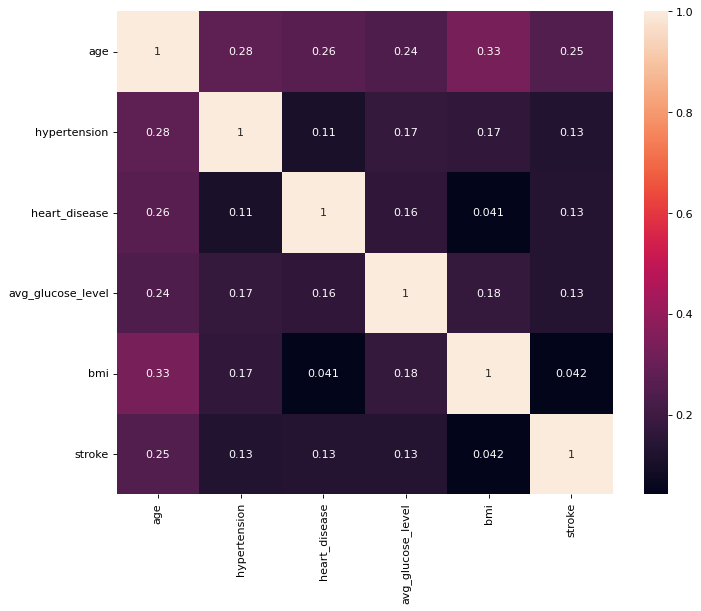

In [8]:
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(data=df.drop(['id'], axis=1).corr(),cmap='rocket',cbar=True,robust=False,annot=True)

## Data Cleaning
### Identify and remove unnecessary data

Remove gender labelled as "other" for clarity

In [9]:
df.drop(df[df.gender == 'Other'].index)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
df[df.work_type == 'Never_worked']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
603,61408,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,13948,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
939,16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
959,56986,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
1462,41870,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
1789,13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1922,51935,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
2346,61219,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
2721,23508,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0


In [11]:
#drop Other value
df.drop(df[df.gender == 'Other'].index, inplace=True)
#drop never_worked
df.drop(df[df.work_type == 'Never_worked'].index, inplace=True)
#drop id column
df.drop('id', axis=1, inplace=True)
#columns to convert to category
cols = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']
#convert columns to category
df[cols] = df[cols].astype('category')
#convert age column to int
df['age'] = df['age'].astype('int')

#check columns types
print(df.dtypes)

gender               category
age                     int64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object


Data set after cleaning

In [12]:
df.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Explore missing values and infinities

In [13]:
df.isnull().mean()

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039512
smoking_status       0.000000
stroke               0.000000
dtype: float64

Fill null values (the bmi for this case) by replacing it with mean

In [14]:
df['bmi'].fillna((df['bmi'].mean()), inplace=True)
df.isnull().mean()

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Data set after replacement of missing data

In [15]:
df.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.90964,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.00000,formerly smoked,1
6,Male,74,1,1,Yes,Private,Rural,70.09,27.40000,never smoked,1
7,Female,69,0,0,No,Private,Urban,94.39,22.80000,never smoked,1
8,Female,59,0,0,Yes,Private,Rural,76.15,28.90964,Unknown,1
9,Female,78,0,0,Yes,Private,Urban,58.57,24.20000,Unknown,1


Creating a copy of dataset for the visualization

In [16]:
data=df.copy()
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.90964,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.90964,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


Convert categorical data into numerical data (Categoical Encoding)

In [17]:
#convert in binary columns with 2 results
columns_obj = ["gender", "ever_married" ,"Residence_type"]
encoding = preprocessing.LabelEncoder()
for col in columns_obj:
    data[col]=  encoding.fit_transform(data[col])
#convert in 0 and 1 the rest of columns    
data = pd.get_dummies(data)
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.60000,1,0,1,0,0,0,1,0,0
1,0,61,0,0,1,0,202.21,28.90964,1,0,0,1,0,0,0,1,0
2,1,80,0,1,1,0,105.92,32.50000,1,0,1,0,0,0,0,1,0
3,0,49,0,0,1,1,171.23,34.40000,1,0,1,0,0,0,0,0,1
4,0,79,1,0,1,0,174.12,24.00000,1,0,0,1,0,0,0,1,0


## Resample the data set
Data ready for resampling

In [18]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.60000,1,0,1,0,0,0,1,0,0
1,0,61,0,0,1,0,202.21,28.90964,1,0,0,1,0,0,0,1,0
2,1,80,0,1,1,0,105.92,32.50000,1,0,1,0,0,0,0,1,0
3,0,49,0,0,1,1,171.23,34.40000,1,0,1,0,0,0,0,0,1
4,0,79,1,0,1,0,174.12,24.00000,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,1,83.75,28.90964,0,0,1,0,0,0,0,1,0
5106,0,81,0,0,1,1,125.20,40.00000,0,0,0,1,0,0,0,1,0
5107,0,35,0,0,1,0,82.99,30.60000,0,0,0,1,0,0,0,1,0
5108,1,51,0,0,1,0,166.29,25.60000,0,0,1,0,0,0,1,0,0


Seperate the label and target

In [19]:
#label
X = data.drop(columns = ['stroke'])
#target
y = data['stroke']

Visualize the data before resampling

In [20]:
beforeX = data.stroke.value_counts(normalize=False)
beforeX

0    4838
1     249
Name: stroke, dtype: int64

In [21]:
beforeY = y.value_counts(normalize=False)
beforeY

0    4838
1     249
Name: stroke, dtype: int64

#### Oversample Data
The dara becomes balanced

In [22]:
smote = SMOTE(random_state=42)
Xre , yre = smote.fit_resample(X,y)

before = data.stroke.value_counts(normalize=True)
after = yre.value_counts(normalize=True)
print('Rows before smote:' + ' {}'.format(data.shape[0]))
print('Rows after smote:' + ' {}'.format(Xre.shape[0]))
print()
print('Strokes before smote:',before)
print()
print('Strokes after smote:' + ' {}'.format(after))

Rows before smote: 5087
Rows after smote: 9676

Strokes before smote: 0    0.951052
1    0.048948
Name: stroke, dtype: float64

Strokes after smote: 1    0.5
0    0.5
Name: stroke, dtype: float64


## Training and split

Visualize the size of the data set

In [23]:
Xre.shape

(9676, 16)

Split the data set into training (80%) and testing (20%)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    Xre,  # predictors
    yre,  # target
    test_size=0.20, # size of test data
    shuffle=True, # shuffle rows
    stratify=yre, # makes a split
    random_state=42)  # seed to ensure reproducibility

Check rows and columns

In [25]:
print('Train set shape:' + ' {}'.format(X_train.shape))
print('Test set shape:' + ' {}'.format(X_test.shape))

Train set shape: (7740, 16)
Test set shape: (1936, 16)


# Logistic regression 

In [26]:
lr_model = LogisticRegression(solver='liblinear',random_state=42, max_iter=2000)

In [27]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

### Predictions
Compare the predicted and actual values to find accuracy

List the first hundred predicted values

In [28]:
pred = lr_model.predict(X_test)
pred[:100]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

List the first hundred actual values

In [29]:
y_test[:100].to_numpy()

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## Measure effectiveness of the model

### Score - Mean Squared Error

Method 1: Use score method to get accuracy of model

In [30]:
score1 = lr_model.score(X_test, y_test)
print(score1)

0.9106404958677686


Method 2: Calculate MSE with sklearn.metrics

In [31]:
score2 = 1 - mean_squared_error(y_test,pred)
print(score2)

0.9106404958677686


Method 3: Manual calculation of MSE

In [32]:
1 - np.mean((y_test - pred)**2)

0.9106404958677686

### Confusion Matrix 

In [33]:
cm_matrix = confusion_matrix(pred,y_test)
cm_matrix

array([[910, 115],
       [ 58, 853]])

### CM plot with sklearn

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


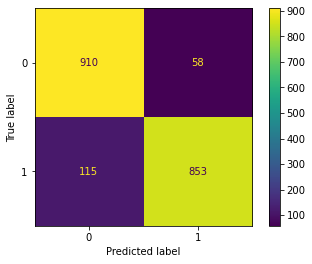

In [34]:
plot_confusion_matrix(lr_model, X_test, y_test)

### CM plot with seaborn

<AxesSubplot:>

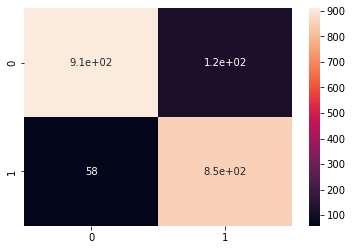

In [35]:
sns.heatmap(cm_matrix,annot=True)

### Normalized CM

In [36]:
np.sum(cm_matrix)

1936

<AxesSubplot:>

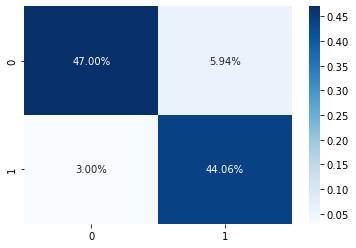

In [37]:
sns.heatmap(cm_matrix/np.sum(cm_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### F-score
F1 = 2*(precision*recall) / (precision+recall) = 2*(TP) / (2TP+FP+FN)

In [38]:
f1_score(y_test, pred, average='binary')

0.9079297498669504

### Move "stroke" output to the end of the data set

In [39]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.60000,1,0,1,0,0,0,1,0,0
1,0,61,0,0,1,0,202.21,28.90964,1,0,0,1,0,0,0,1,0
2,1,80,0,1,1,0,105.92,32.50000,1,0,1,0,0,0,0,1,0
3,0,49,0,0,1,1,171.23,34.40000,1,0,1,0,0,0,0,0,1
4,0,79,1,0,1,0,174.12,24.00000,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,1,83.75,28.90964,0,0,1,0,0,0,0,1,0
5106,0,81,0,0,1,1,125.20,40.00000,0,0,0,1,0,0,0,1,0
5107,0,35,0,0,1,0,82.99,30.60000,0,0,0,1,0,0,0,1,0
5108,1,51,0,0,1,0,166.29,25.60000,0,0,1,0,0,0,1,0,0


In [40]:
y = data['stroke']
print(data.shape)
data = data.drop("stroke",axis=1)

(5087, 17)


In [41]:
Xre

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.690000,36.600000,0,1,0,0,0,1,0,0
1,0,61,0,0,1,0,202.210000,28.909640,0,0,1,0,0,0,1,0
2,1,80,0,1,1,0,105.920000,32.500000,0,1,0,0,0,0,1,0
3,0,49,0,0,1,1,171.230000,34.400000,0,1,0,0,0,0,0,1
4,0,79,1,0,1,0,174.120000,24.000000,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,0,74,0,0,0,1,98.537029,25.519240,0,0,0,0,0,0,0,0
9672,0,70,0,0,0,1,72.433261,34.967170,0,0,0,0,0,0,0,0
9673,0,78,0,0,1,0,109.951895,30.034492,0,0,0,0,0,0,0,0
9674,1,51,0,0,1,1,112.058981,41.552945,0,1,0,0,0,1,0,0


In [42]:
Xre['stroke'] = y
Xre

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,67,0,1,1,1,228.690000,36.600000,0,1,0,0,0,1,0,0,1.0
1,0,61,0,0,1,0,202.210000,28.909640,0,0,1,0,0,0,1,0,1.0
2,1,80,0,1,1,0,105.920000,32.500000,0,1,0,0,0,0,1,0,1.0
3,0,49,0,0,1,1,171.230000,34.400000,0,1,0,0,0,0,0,1,1.0
4,0,79,1,0,1,0,174.120000,24.000000,0,0,1,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,0,74,0,0,0,1,98.537029,25.519240,0,0,0,0,0,0,0,0,NaN
9672,0,70,0,0,0,1,72.433261,34.967170,0,0,0,0,0,0,0,0,NaN
9673,0,78,0,0,1,0,109.951895,30.034492,0,0,0,0,0,0,0,0,NaN
9674,1,51,0,0,1,1,112.058981,41.552945,0,1,0,0,0,1,0,0,NaN


In [43]:
XXre=Xre.copy()

Heatmap of correlations in detail

<AxesSubplot:>

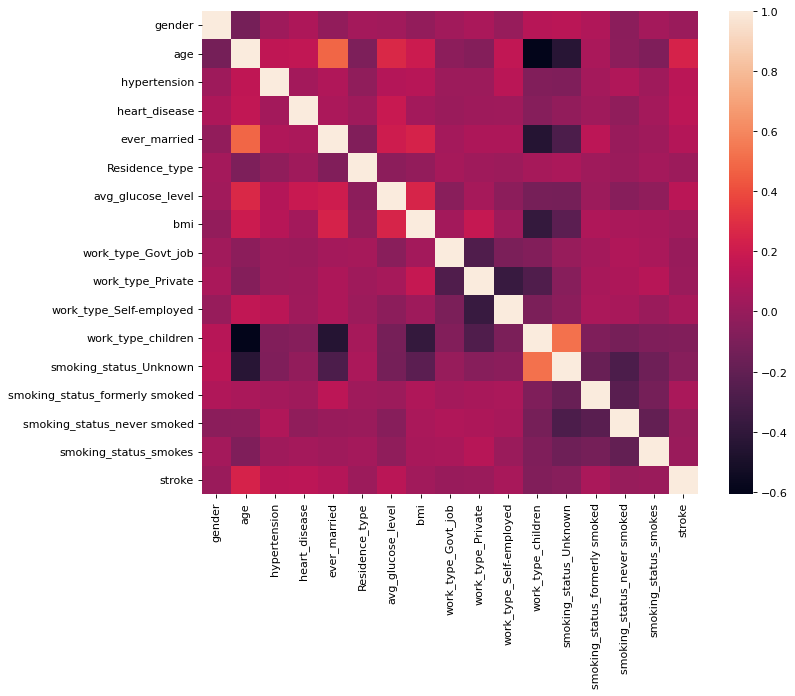

In [44]:
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(Xre.corr(),cmap='rocket',cbar=True,robust=False,annot=False)

# Logistic Regression Model w/o unimportant features
### Remove features with low correlation based on the heatmap visualization and create a new model

In [45]:
collection = ['gender','Residence_type','work_type_children','smoking_status_Unknown','stroke']
for M in collection:
    Xre.drop(M, axis=1, inplace=True)

In [46]:
Xre

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,1,228.690000,36.600000,0,1,0,1,0,0
1,61,0,0,1,202.210000,28.909640,0,0,1,0,1,0
2,80,0,1,1,105.920000,32.500000,0,1,0,0,1,0
3,49,0,0,1,171.230000,34.400000,0,1,0,0,0,1
4,79,1,0,1,174.120000,24.000000,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9671,74,0,0,0,98.537029,25.519240,0,0,0,0,0,0
9672,70,0,0,0,72.433261,34.967170,0,0,0,0,0,0
9673,78,0,0,1,109.951895,30.034492,0,0,0,0,0,0
9674,51,0,0,1,112.058981,41.552945,0,1,0,1,0,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    Xre,
    yre,
    test_size=0.20,
    shuffle=True,
    stratify=yre,
    random_state=42)
print('Train set shape:' + ' {}'.format(X_train.shape))
print('Test set shape:' + ' {}'.format(X_test.shape))

Train set shape: (7740, 12)
Test set shape: (1936, 12)


In [48]:
lr_model = LogisticRegression(solver='liblinear',random_state=42, max_iter=2000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [49]:
pred = lr_model.predict(X_test)
pred[:100]

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [50]:
#MSE
score1 = lr_model.score(X_test, y_test)
print(score1)

0.8662190082644629


In [51]:
f1_score(y_test, pred, average='binary')

0.8657335406946604

### The accuracy decreased to ~87%

# Logistic Regression Model w/o important features
### Remove features with high correlation based on the heatmap visualization and create a new model

In [52]:
collection1 = ['age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi','work_type_Govt_job','work_type_Private','work_type_Self-employed','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','stroke']

for M in collection1:
    XXre.drop(M, axis=1, inplace=True)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    XXre,
    yre,
    test_size=0.20,
    shuffle=True,
    stratify=yre,
    random_state=42)
print('Train set shape:' + ' {}'.format(X_train.shape))
print('Test set shape:' + ' {}'.format(X_test.shape))

Train set shape: (7740, 4)
Test set shape: (1936, 4)


In [54]:
lr_model = LogisticRegression(solver='liblinear',random_state=42, max_iter=2000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [55]:
score1 = lr_model.score(X_test, y_test)
print(score1)

0.6616735537190083


In [56]:
pred = lr_model.predict(X_test)
pred[:100]

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [57]:
f1_score(y_test, pred, average='binary')

0.7192456065152165

### The accuracy decreased to ~66%